In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from plotting import *

In [2]:
np.random.seed(22)

# Toy Dataset
def generate_dataset():
    cov1 = np.array([[1, 0], 
                     [0, 2]])
    cov2 = np.array([[2, 0], 
                     [0, 1]])
    data1 = np.random.multivariate_normal(np.array([0, 0]), cov1, 20)
    data2 = np.random.multivariate_normal(np.array([2, 2]), cov2, 20)
    data = np.concatenate((data1, data2), axis=0)
    classes = np.array([0 for i in range(20)] + [1 for i in range(20)])
    return data, classes

In [3]:
x, y = generate_dataset()

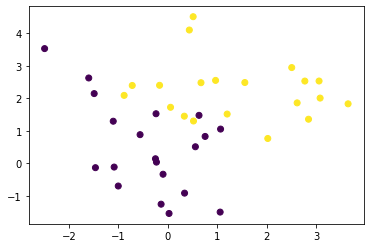

In [4]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [5]:
n_components = 2

gauss = GaussianMixture(n_components=n_components, covariance_type="diag")
gauss.fit(x)

print("Model converged: ", gauss.converged_)

Model converged:  True


In [6]:
covs = gauss.covariances_
means = gauss.means_

print("Cov:")
print(np.diag(covs[0]), "\n")
print(np.diag(covs[1]), "\n")

print("Means:")
print(means[0], "\n")
print(means[1])

Cov:
[[0.12495111 0.        ]
 [0.         0.24901164]] 

[[1.00488209 0.        ]
 [0.         2.28305805]] 

Means:
[2.93157589 2.14893141] 

[-0.01240011  1.20178175]


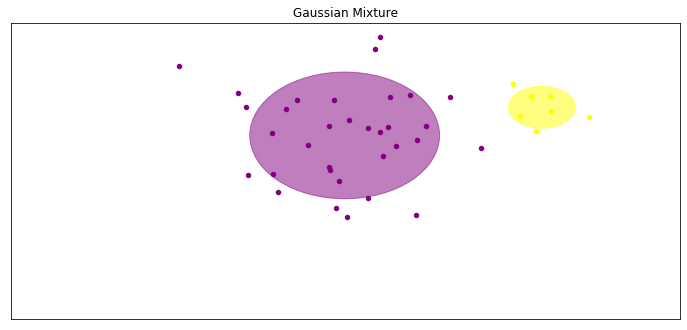

In [7]:
cov1 = np.diag(covs[0])
cov2 = np.diag(covs[1])

plot_results(x, y, gauss.predict(x), means, [cov1, cov2], 0, "Gaussian Mixture")